# Importo las bibliotecas necesarias

In [369]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report


# Carga de datos

In [370]:
df_canciones = pd.read_csv("/content/Canciones_Spotify.csv")
df_canciones

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


# Análisis exploratorio de datos (EDA):

In [371]:
df_canciones.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [372]:
df_canciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


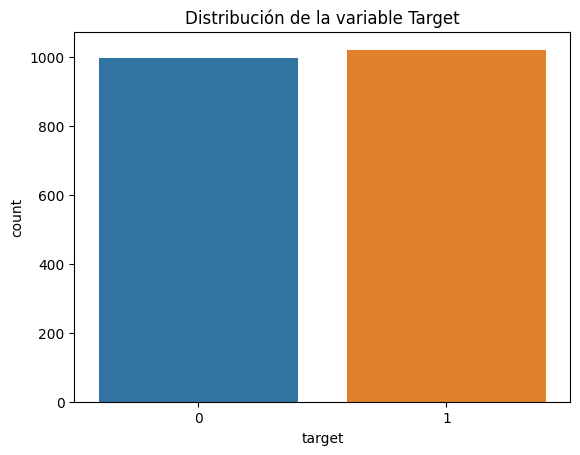

In [373]:
# Visualización de la distribución de la variable target

sns.countplot(x='target', data=df_canciones)
plt.title("Distribución de la variable Target")
plt.show()

In [374]:
# Verifico si hay faltan de datos.

print("\nHay Columnas con NAN?")
print(np.sum(df_canciones.isna().sum()>0))
print("\nCuales?")
nan_list = df_canciones.columns[df_canciones.isna().any()].tolist()
print(nan_list)



Hay Columnas con NAN?
0

Cuales?
[]


# Preprocesamiento de los datos

In [375]:
# Elimino la Columna Unnamed:0

data = df_canciones.drop("Unnamed: 0", axis=1)
data

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [376]:
 # Elimino los espacios que pueda llegar a haber en los registros.

colum_name_fixed = data.columns.str.replace(' ', '')
colum_name_fixed = dict(zip(data.columns, colum_name_fixed))
data.rename(columns = colum_name_fixed, inplace = True)

In [377]:
# Codifico las variables categóricas.

numeric_features = list(data.dtypes[data.dtypes != "object"].index)

non_numeric_features = list(data.dtypes[data.dtypes == "object"].index)

In [378]:
numeric_features

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'target']

In [379]:
non_numeric_features

['song_title', 'artist']

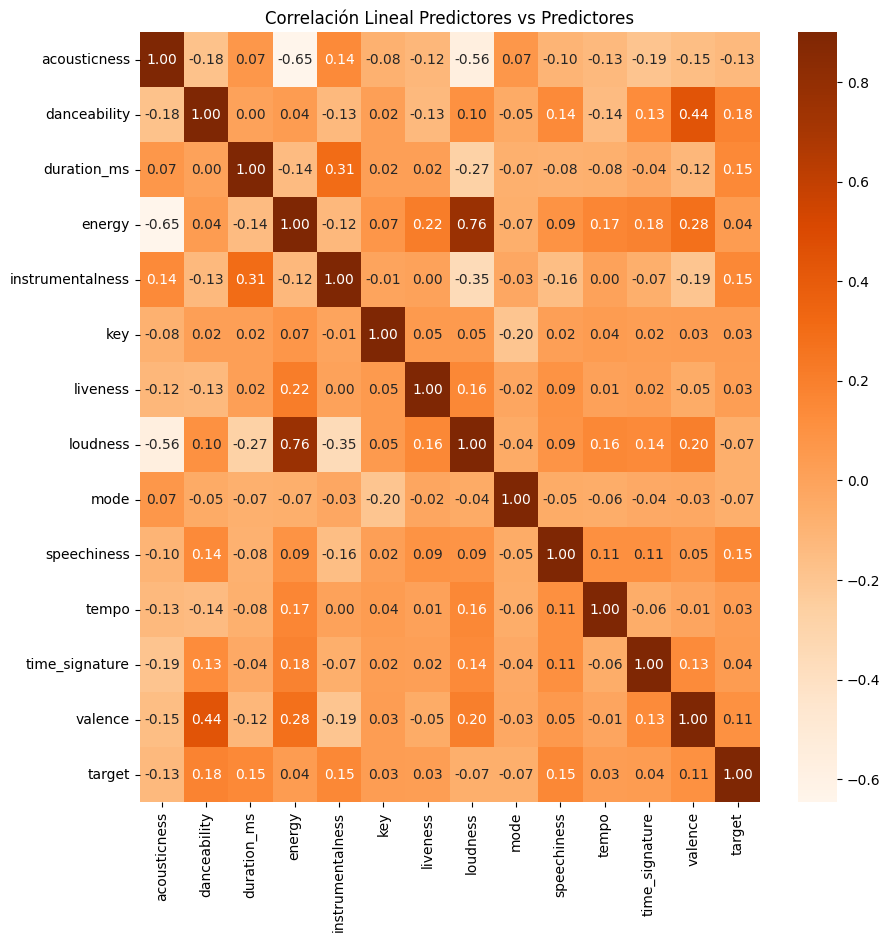

In [380]:
# Calculo y muestro la correlación lineal del los predictores.

n_show = min(len(numeric_features),25)

corrmat = data[numeric_features[:n_show]].corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.9, annot=True, ax=ax,cmap="Oranges", fmt=".2f")
ax.set_title("Correlación Lineal Predictores vs Predictores")
plt.show()

In [381]:
data = data.drop(["mode", "key"], axis=1)

In [382]:
# Separo las variables categoricas de las no categoricas.
X = data.drop(["song_title","artist","target"], axis=1)
y = data["target"]

# Divido en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [383]:
# Escalado de características

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [384]:
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

# Validación Simple. Evaluación y análisis del rendimiento de cada modelo:

● Matriz de confusión

● Precisión, recall y F1-score


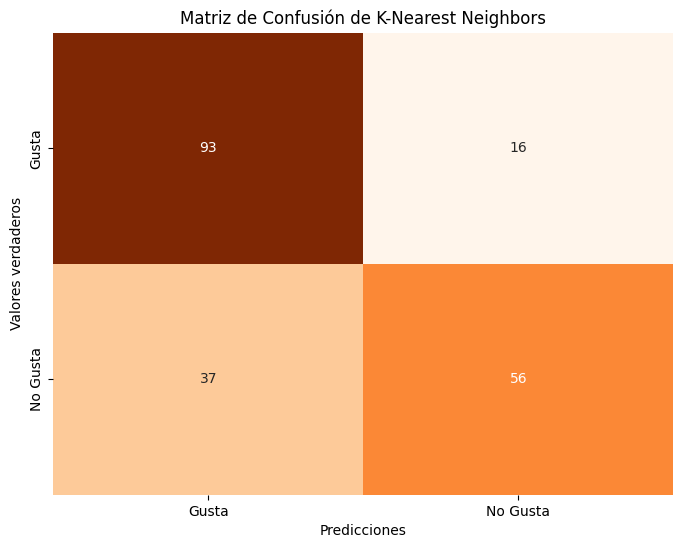


Precisión del modelo: 0.74
Precisión: 0.74
Recall: 0.74
F1-Score: 0.73



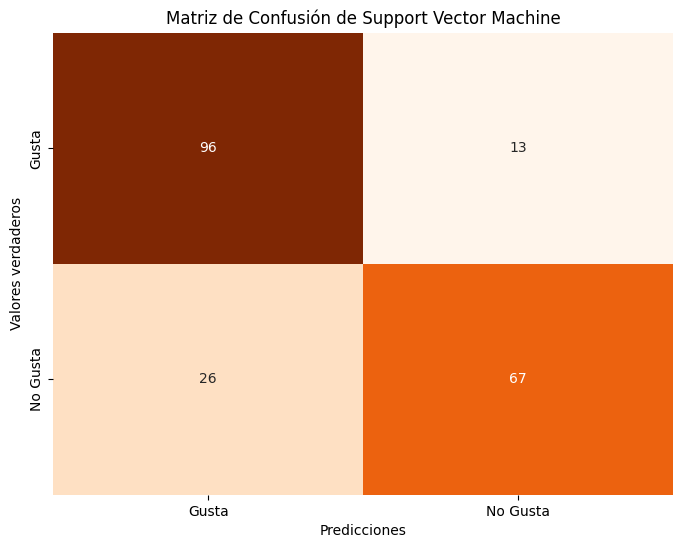


Precisión del modelo: 0.81
Precisión: 0.81
Recall: 0.81
F1-Score: 0.81



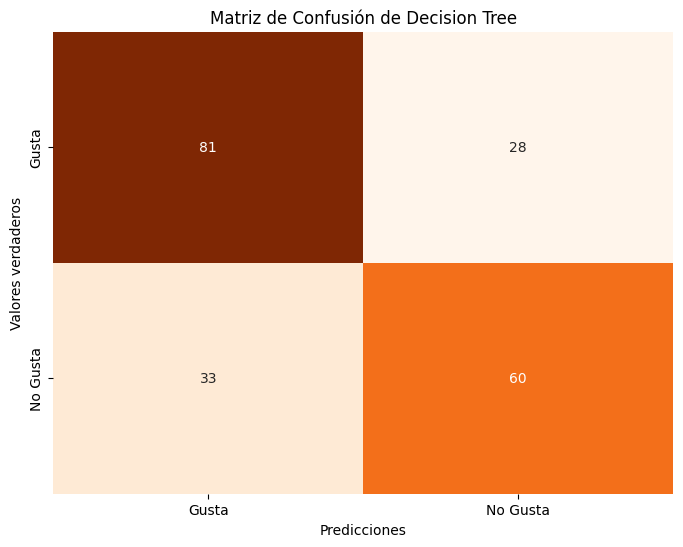


Precisión del modelo: 0.70
Precisión: 0.70
Recall: 0.70
F1-Score: 0.70



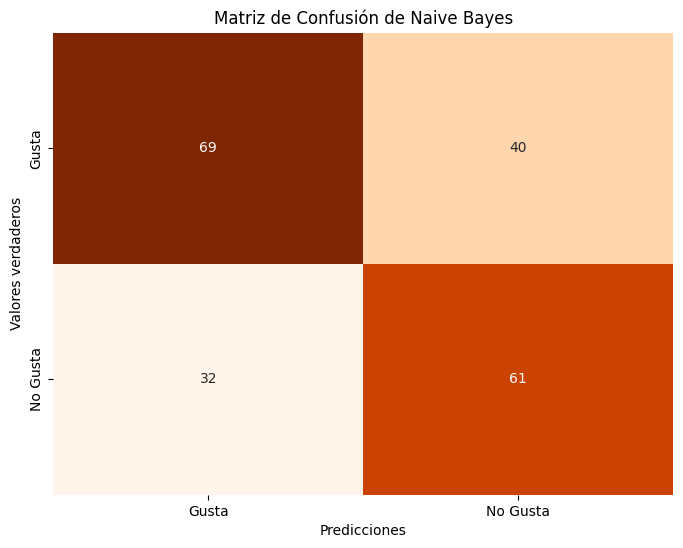


Precisión del modelo: 0.64
Precisión: 0.65
Recall: 0.64
F1-Score: 0.64



In [385]:
for model_name, model in models.items():
    # Entrena el modelo en el conjunto de entrenamiento
    model.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcula la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)

    # Calcula la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)

    # Calcula la precisión, recall y F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Imprime sus métricas

    # Creo un mapa de calor para visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Oranges', cbar=False,
                xticklabels=['Gusta', 'No Gusta'], yticklabels=['Gusta', 'No Gusta'])
    plt.xlabel('Predicciones')
    plt.ylabel('Valores verdaderos')
    plt.title(f'Matriz de Confusión de {model_name}')
    plt.show()
    print()

    print(f"Precisión del modelo: {accuracy:.2f}")
    print(f"Precisión: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print()

# Validación Cruzada k-fold. Evaluación y análisis de cada uno de los modelos:
● Matriz de confusión

● Precisión, recall y F1-score

MODELO: K-Nearest Neighbors

Puntaje del pliegue 1: 0.72
Puntaje del pliegue 2: 0.69
Puntaje del pliegue 3: 0.70
Puntaje del pliegue 4: 0.68
Puntaje del pliegue 5: 0.70
Puntaje del pliegue 6: 0.75
Puntaje del pliegue 7: 0.73
Puntaje del pliegue 8: 0.69
Puntaje del pliegue 9: 0.71
Puntaje del pliegue 10: 0.67

Puntaje Promedio: 0.70
Desviación estándar de los puntajes: 0.02

Métricas en el conjunto de prueba:



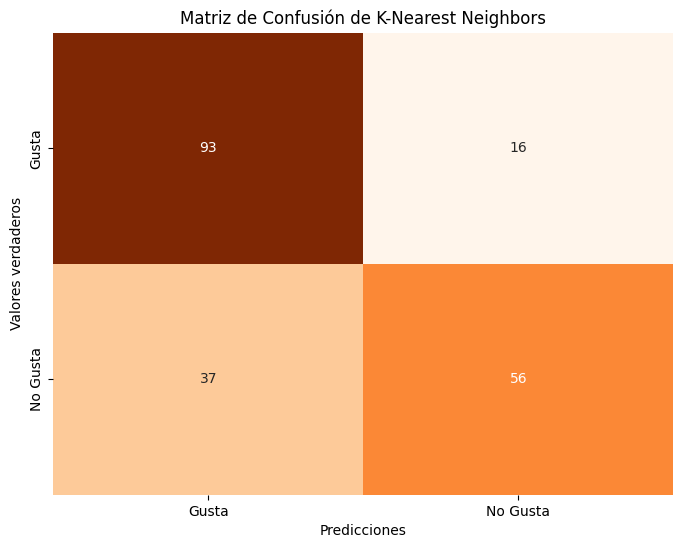


Precisión: 0.74
Recall: 0.74
F1-Score: 0.73

MODELO: Support Vector Machine

Puntaje del pliegue 1: 0.74
Puntaje del pliegue 2: 0.75
Puntaje del pliegue 3: 0.77
Puntaje del pliegue 4: 0.70
Puntaje del pliegue 5: 0.75
Puntaje del pliegue 6: 0.73
Puntaje del pliegue 7: 0.75
Puntaje del pliegue 8: 0.75
Puntaje del pliegue 9: 0.77
Puntaje del pliegue 10: 0.72

Puntaje Promedio: 0.74
Desviación estándar de los puntajes: 0.02

Métricas en el conjunto de prueba:



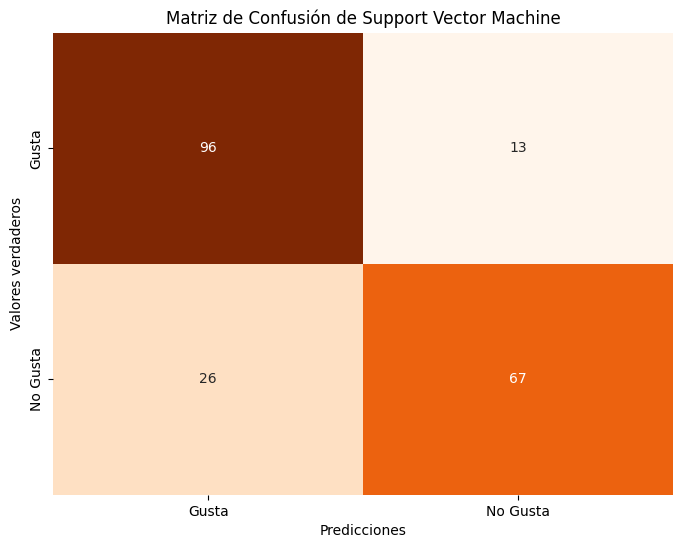


Precisión: 0.81
Recall: 0.81
F1-Score: 0.81

MODELO: Decision Tree

Puntaje del pliegue 1: 0.74
Puntaje del pliegue 2: 0.65
Puntaje del pliegue 3: 0.68
Puntaje del pliegue 4: 0.65
Puntaje del pliegue 5: 0.70
Puntaje del pliegue 6: 0.66
Puntaje del pliegue 7: 0.69
Puntaje del pliegue 8: 0.71
Puntaje del pliegue 9: 0.66
Puntaje del pliegue 10: 0.70

Puntaje Promedio: 0.68
Desviación estándar de los puntajes: 0.03

Métricas en el conjunto de prueba:



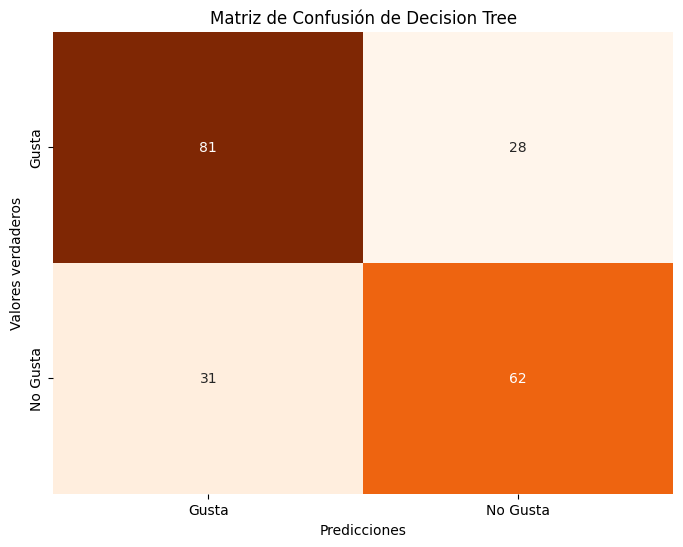


Precisión: 0.71
Recall: 0.71
F1-Score: 0.71

MODELO: Naive Bayes

Puntaje del pliegue 1: 0.70
Puntaje del pliegue 2: 0.68
Puntaje del pliegue 3: 0.60
Puntaje del pliegue 4: 0.62
Puntaje del pliegue 5: 0.66
Puntaje del pliegue 6: 0.69
Puntaje del pliegue 7: 0.60
Puntaje del pliegue 8: 0.65
Puntaje del pliegue 9: 0.62
Puntaje del pliegue 10: 0.65

Puntaje Promedio: 0.65
Desviación estándar de los puntajes: 0.03

Métricas en el conjunto de prueba:



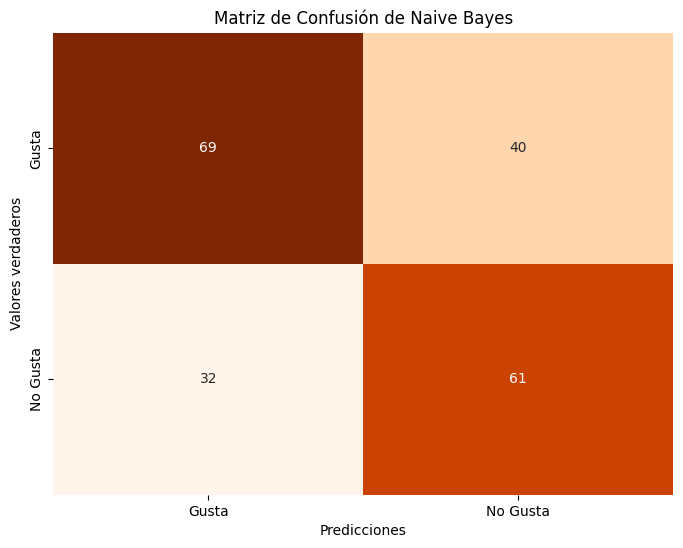


Precisión: 0.65
Recall: 0.64
F1-Score: 0.64



In [386]:
# Especifico el número de pliegues (k) para la validación cruzada
k = 10

# Creo un objeto KFold para dividir los datos en pliegues
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for model_name, model in models.items():
    # Realizo la validación cruzada y obtengo los puntajes (scores)
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

    # Imprimo los puntajes de cada pliegue
    print(f"MODELO: {model_name}")
    print()

    for i, score in enumerate(scores):
        print(f"Puntaje del pliegue {i + 1}: {score:.2f}")

    # Calculo el puntaje promedio y su desviación estándar
    mean_score = scores.mean()
    std_score = scores.std()
    print()
    print(f"Puntaje Promedio: {mean_score:.2f}")
    print(f"Desviación estándar de los puntajes: {std_score:.2f}")
    print()

    # Entrena el modelo en todos los datos de entrenamiento
    model.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcula la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)

    # Calcula la precisión, recall y F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Imprime las métricas de evaluación
    print("Métricas en el conjunto de prueba:")
    print()
    # Creo un mapa de calor para visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Oranges', cbar=False,
                xticklabels=['Gusta', 'No Gusta'], yticklabels=['Gusta', 'No Gusta'])
    plt.xlabel('Predicciones')
    plt.ylabel('Valores verdaderos')
    plt.title(f'Matriz de Confusión de {model_name}')
    plt.show()
    print()
    print(f"Precisión: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print()

# Ajustes de hiperparametros para los distintos modelos: Knn, SVM, Decision Tree y Naive Bayes con Grid Search y Random Search.

In [387]:
# Defino los modelos con sus espacios de búsqueda de hiperparámetros.

models = {
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': [10,20,30],
            'metric': ['minkowski', 'manhattan'],
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto', 0.1, 1],
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'param_grid': {} # No posee hiperparámetros.
    }
}


# Inicializo un diccionario para los mejores parámetros Grid Search y Random Search
best_params_grid = {}
best_params_random = {}


for model_name, model_info in models.items():
    model = model_info['model']
    param_grid = model_info['param_grid']

    # Grid Search: busco los mejores parametros para cada modelo y lo guardo en el diccionario best_params_grid
    grid_search = GridSearchCV(model, param_grid, scoring='precision', cv=5)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    precision = precision_score(y_test, y_pred)

    best_params_grid[model_name] = {'model': model, 'best_params': grid_search.best_params_}

    # Busco la mejor precisión de Grid Search
    if precision > best_precision_grid:
        best_precision_grid = precision

    print(f'{model_name} (Grid Search) - Precision: {precision:.2f}')

    # Random Search: busco los mejores parámetros para cada modelo y lo guardo en el diccionario best_params_random
    random_search = RandomizedSearchCV(model, param_distributions=param_grid, scoring='precision', n_iter=10, cv=5)
    random_search.fit(X_train, y_train)
    y_pred = random_search.predict(X_test)
    precision = precision_score(y_test, y_pred)

    best_params_random[model_name] = {'model': model, 'best_params': random_search.best_params_}

    # Busco la mejor precisión para Random Search
    if precision > best_precision_random:
        best_precision_random = precision

    print(f'{model_name} (Random Search) - Precision: {precision:.2f}')
    print()

print()
print(f'Best Precision (Grid Search): {best_precision_grid:.2f}')
print('Best Parameters (Grid Search):', best_params_grid)
print()
print(f'Best Precision (Random Search): {best_precision_random:.2f}')
print('Best Parameters (Random Search):', best_params_random)
print()


K-Nearest Neighbors (Grid Search) - Precision: 0.81
K-Nearest Neighbors (Random Search) - Precision: 0.81

Support Vector Machine (Grid Search) - Precision: 0.85
Support Vector Machine (Random Search) - Precision: 0.84

Decision Tree (Grid Search) - Precision: 0.71
Decision Tree (Random Search) - Precision: 0.70

Naive Bayes (Grid Search) - Precision: 0.60
Naive Bayes (Random Search) - Precision: 0.60


Best Precision (Grid Search): 0.85
Best Parameters (Grid Search): {'K-Nearest Neighbors': {'model': KNeighborsClassifier(), 'best_params': {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}}, 'Support Vector Machine': {'model': SVC(), 'best_params': {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}}, 'Decision Tree': {'model': DecisionTreeClassifier(), 'best_params': {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10}}, 'Naive Bayes': {'model': GaussianNB(), 'best_params': {}}}

Best Precision (Random S

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Modelo: K-Nearest Neighbors (Grid Search)
Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


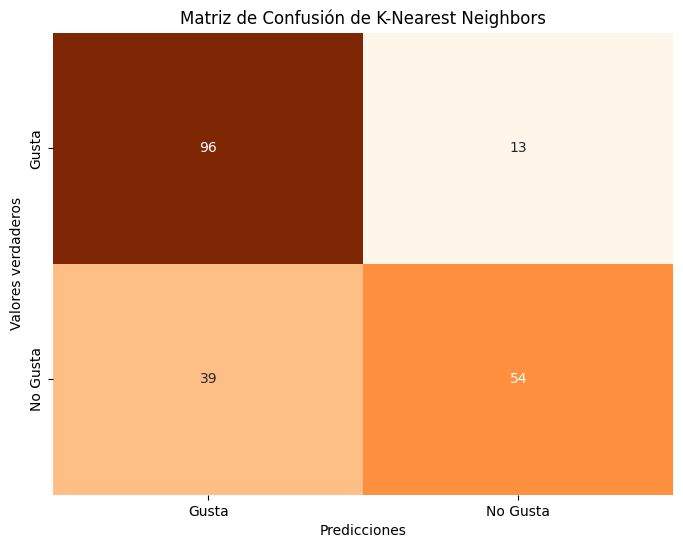


Precisión: 0.75
Recall: 0.74
F1-Score: 0.74

Precisión: 0.75
Recall: 0.74
F1-Score: 0.74

Modelo: Support Vector Machine (Grid Search)
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


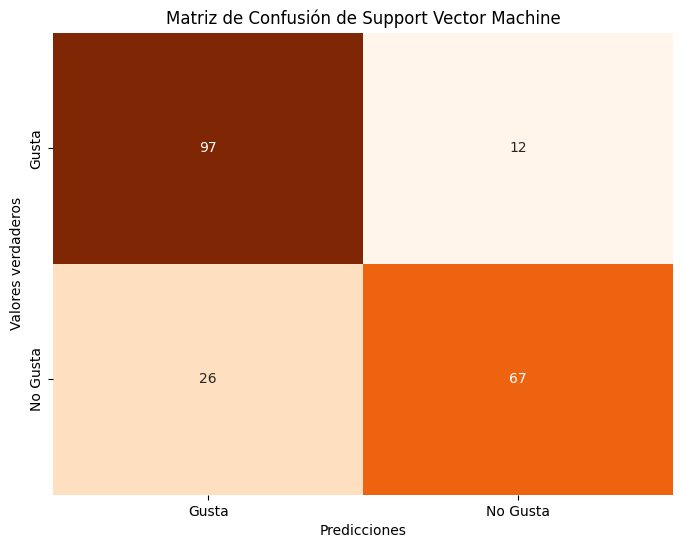


Precisión: 0.82
Recall: 0.81
F1-Score: 0.81

Precisión: 0.82
Recall: 0.81
F1-Score: 0.81

Modelo: Decision Tree (Grid Search)
Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10}


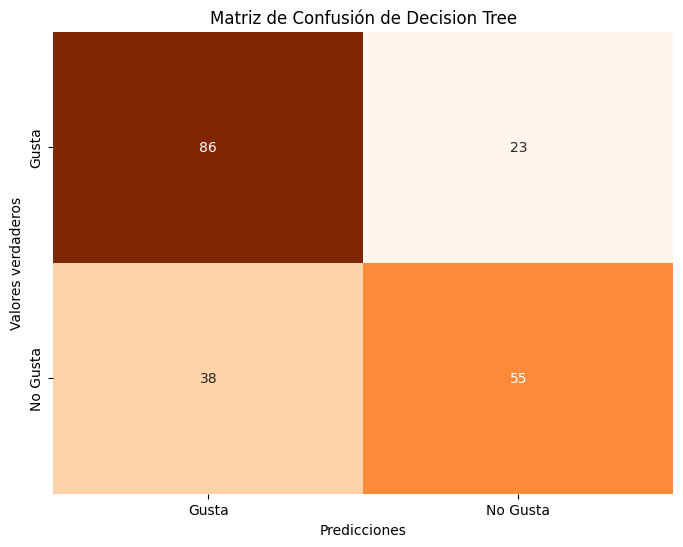


Precisión: 0.70
Recall: 0.70
F1-Score: 0.69

Precisión: 0.70
Recall: 0.70
F1-Score: 0.69

Modelo: Naive Bayes (Grid Search)
Best Parameters: {}


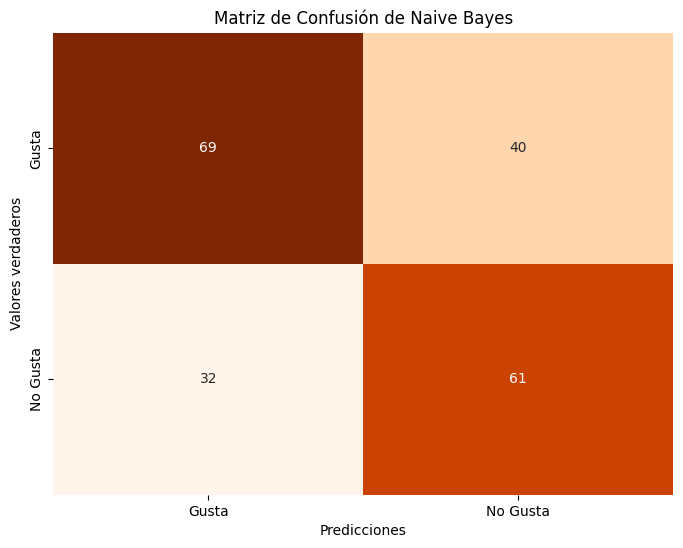


Precisión: 0.65
Recall: 0.64
F1-Score: 0.64

Precisión: 0.65
Recall: 0.64
F1-Score: 0.64

Modelo: K-Nearest Neighbors (Random Search)
Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'metric': 'manhattan', 'leaf_size': 10, 'algorithm': 'brute'}


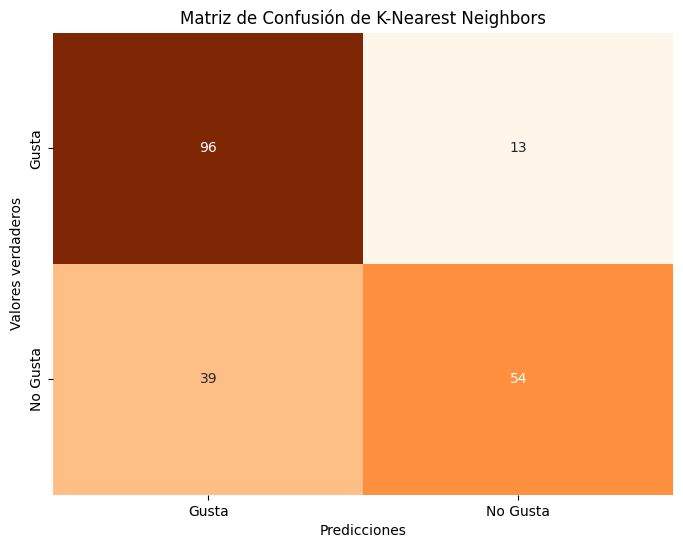


Precisión: 0.75
Recall: 0.74
F1-Score: 0.74

Precisión: 0.75
Recall: 0.74
F1-Score: 0.74

Modelo: Support Vector Machine (Random Search)
Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}


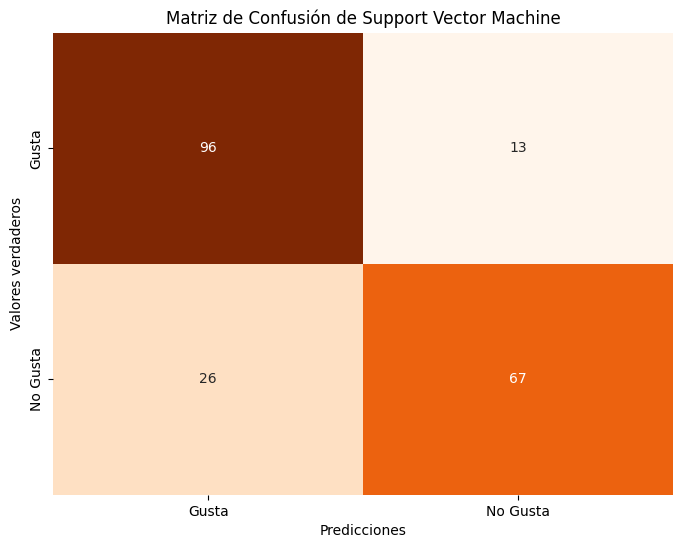


Precisión: 0.81
Recall: 0.81
F1-Score: 0.81

Precisión: 0.81
Recall: 0.81
F1-Score: 0.81

Modelo: Decision Tree (Random Search)
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30, 'criterion': 'gini'}


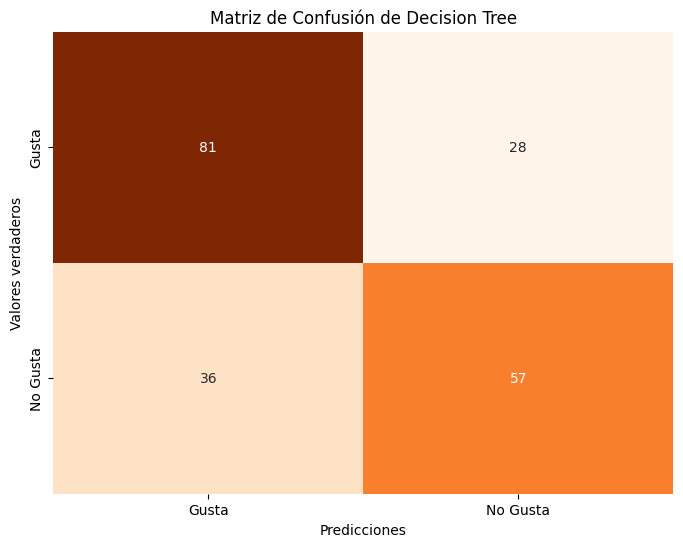


Precisión: 0.68
Recall: 0.68
F1-Score: 0.68

Precisión: 0.68
Recall: 0.68
F1-Score: 0.68

Modelo: Naive Bayes (Random Search)
Best Parameters: {}


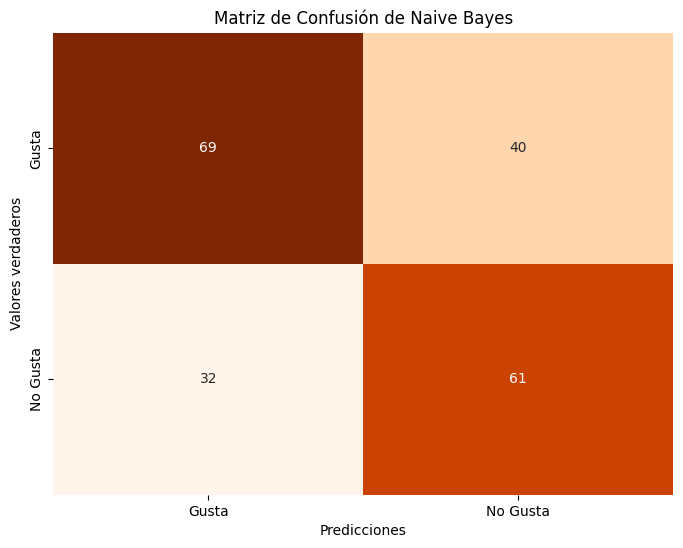


Precisión: 0.65
Recall: 0.64
F1-Score: 0.64

Precisión: 0.65
Recall: 0.64
F1-Score: 0.64



In [388]:
for model_name, best_params in best_params_grid.items():
    model = best_params['model']

    # Entrena el modelo con los mejores parámetros en el conjunto de entrenamiento
    model.set_params(**best_params['best_params'])
    model.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcula la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)

    # Calcula la precisión, recall y F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Imprime las métricas de evaluación para Grid Search
    print(f'Modelo: {model_name} (Grid Search)')
    print(f'Best Parameters: {best_params["best_params"]}')
    # Creo un mapa de calor para visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Oranges', cbar=False,
                xticklabels=['Gusta', 'No Gusta'], yticklabels=['Gusta', 'No Gusta'])
    plt.xlabel('Predicciones')
    plt.ylabel('Valores verdaderos')
    plt.title(f'Matriz de Confusión de {model_name}')
    plt.show()
    print()

    print(f"Precisión: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print()
    print(f'Precisión: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')
    print()

for model_name, best_params in best_params_random.items():
    model = best_params['model']

    # Entrena el modelo con los mejores parámetros en el conjunto de entrenamiento
    model.set_params(**best_params['best_params'])
    model.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcula la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)

    # Calcula la precisión, recall y F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Imprime las métricas de evaluación para Random Search
    print(f'Modelo: {model_name} (Random Search)')
    print(f'Best Parameters: {best_params["best_params"]}')
    # Creo un mapa de calor para visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Oranges', cbar=False,
                xticklabels=['Gusta', 'No Gusta'], yticklabels=['Gusta', 'No Gusta'])
    plt.xlabel('Predicciones')
    plt.ylabel('Valores verdaderos')
    plt.title(f'Matriz de Confusión de {model_name}')
    plt.show()
    print()

    print(f"Precisión: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print()
    print(f'Precisión: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')
    print()

# Realizar un ensamble de los modelos:
  ● Votación Mayoritaria

In [389]:
# Creo una lista de tuplas con los nombres de los modelos y las instancias de los modelos
model_tuples = [(model_name, model_info['model']) for model_name, model_info in models.items()]

# Creo el ensamble de modelos por votación mayoritaria
ensemble = VotingClassifier(estimators=model_tuples, voting='hard')  # 'hard' para votación mayoritaria

# Ajusto el ensamble a tus datos de entrenamiento
ensemble.fit(X_train, y_train)

# Realizo predicciones utilizando el ensamble
y_pred = ensemble.predict(X_test)

# Evaluo el rendimiento del ensamble
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del ensamble: {accuracy:.2f}')

Precisión del ensamble: 0.75


# Evaluación y análisis del rendimiento:
  ● Matriz de confusión
  
  ● Precisión, recall y F1-score

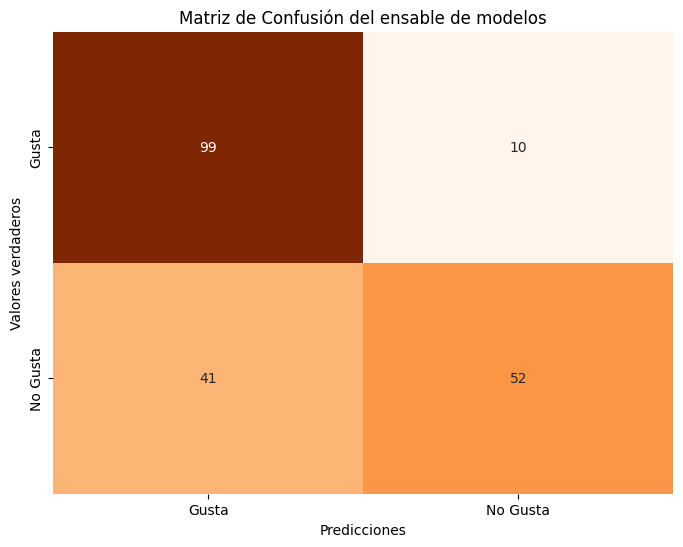


Precisión: 0.84
Recall: 0.56
F1-Score: 0.67


In [390]:
# Calculo la matriz de confusión

confusion = confusion_matrix(y_test, y_pred)

# Creo un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Gusta', 'No Gusta'], yticklabels=['Gusta', 'No Gusta'])
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión del ensable de modelos')
plt.show()
print()

# Calculo la precisión, el recall y el F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
